# 속성 데이터 2진 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
!wget https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/sonar.csv

--2021-09-24 14:37:19--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/data/sonar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/plain]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K  --.-KB/s    in 0.007s  

2021-09-24 14:37:19 (12.1 MB/s) - ‘sonar.csv’ saved [87776/87776]



In [4]:
raw_data = pd.read_csv("sonar.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:60]
y = data[:,60]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [6]:
print(train_x[:1])
print(train_y[:5])

[[0.079  0.0707 0.0352 0.166  0.133  0.0226 0.0771 0.2678 0.5664 0.6609
  0.5002 0.2583 0.165  0.4347 0.4515 0.4579 0.3366 0.4    0.5325 0.901
  0.9939 0.3689 0.1012 0.0248 0.2318 0.3981 0.2259 0.5247 0.6898 0.8316
  0.4326 0.3741 0.5756 0.8043 0.7963 0.7174 0.7056 0.8148 0.7601 0.6034
  0.4554 0.4729 0.4478 0.3722 0.4693 0.3839 0.0768 0.1467 0.0777 0.0469
  0.0193 0.0298 0.039  0.0294 0.0175 0.0249 0.0141 0.0073 0.0025 0.0101]]
[1. 0. 1. 1. 1.]


In [7]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(165, 60)
(165,)
(42, 60)
(42,)


# Template

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                610       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


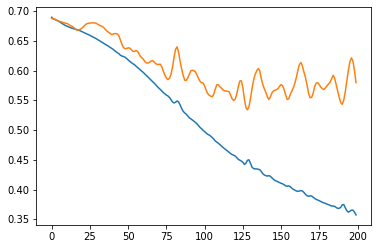

2/2 [==============================] - 0s 7ms/step - loss: 0.3919 - acc: 0.8095 - auc: 0.9050 - precision_3: 0.8000 - recall_3: 0.8696
loss= 0.3919418752193451
acc= 0.8095238208770752
auc= 0.9050343632698059
precision= 0.800000011920929
recall= 0.8695651888847351


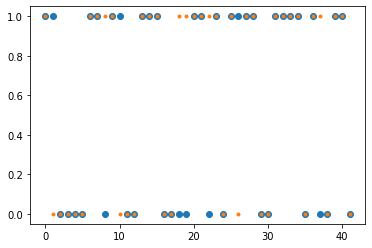

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC, Precision, Recall

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(60,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["acc", "AUC", Precision(), Recall()])
model.summary()

history = model.fit(train_x, train_y, epochs=200, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc, auc, precision, recall = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
print("auc=", auc)
print("precision=", precision)
print("recall=", recall)




y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()